In [ ]:
"""
https://arm-doe.github.io/pyart/examples/plotting/plot_nexrad_reflectivity.html#sphx-glr-examples-plotting-plot-nexrad-reflectivity-py
"""

print(__doc__)

# Author: Jonathan J. Helmus (jhelmus@anl.gov)
# License: BSD 3 clause

import matplotlib.pyplot as plt
import pyart
from pyart.testing import get_test_data

# open the file, create the displays and figure
filename = get_test_data("Level2_KATX_20130717_1950.ar2v")
radar = pyart.io.read_nexrad_archive(filename)
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(6, 5))

# plot super resolution reflectivity
ax = fig.add_subplot(111)
display.plot(
    "reflectivity",
    0,
    title="NEXRAD Reflectivity",
    vmin=-32,
    vmax=64,
    colorbar_label="",
    ax=ax,
)
display.plot_range_ring(radar.range["data"][-1] / 1000.0, ax=ax)
display.set_limits(xlim=(-500, 500), ylim=(-500, 500), ax=ax)
plt.show()


https://arm-doe.github.io/pyart/examples/plotting/plot_ppi_cfradial.html#sphx-glr-examples-plotting-plot-ppi-cfradial-py



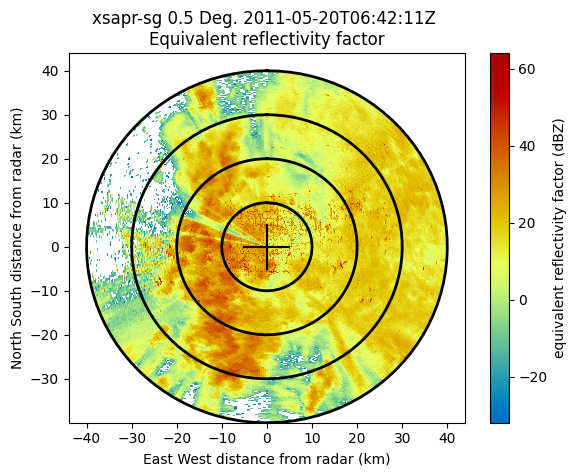

In [3]:
"""
https://arm-doe.github.io/pyart/examples/plotting/plot_ppi_cfradial.html#sphx-glr-examples-plotting-plot-ppi-cfradial-py
"""

print(__doc__)

# Author: Max Grover (mgrover@anl.gov)
# License: BSD 3 clause

import matplotlib.pyplot as plt

import pyart
from pyart.testing import get_test_data

# Locate the test data and read in using main read method
filename = get_test_data("swx_20120520_0641.nc")
radar = pyart.io.read(filename)

# Setup the display, which automatically detects this is a ppi scan
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure()
ax = fig.add_subplot(111)
display.plot("reflectivity_horizontal", 0, vmin=-32, vmax=64.0)
display.plot_range_rings([10, 20, 30, 40])
display.plot_cross_hair(5.0)
plt.show()


https://arm-doe.github.io/pyart/examples/plotting/plot_ppi_cfradial.html#sphx-glr-examples-plotting-plot-ppi-cfradial-py



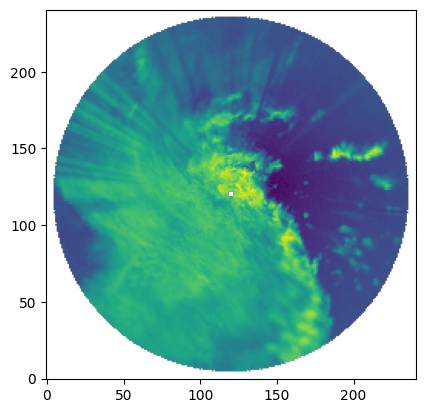

In [4]:
print(__doc__)

# Author: Jonathan J. Helmus (jhelmus@anl.gov)
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

import pyart
from pyart.testing import get_test_data

# read in the data
file = get_test_data("110635.mdv")
radar = pyart.io.read_mdv(file)

# mask out last 10 gates of each ray, this removes the "ring" around the radar.
radar.fields["reflectivity"]["data"][:, -10:] = np.ma.masked

# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked("reflectivity")

# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radar,),
    gatefilters=(gatefilter,),
    grid_shape=(1, 241, 241),
    grid_limits=((2000, 2000), (-123000.0, 123000.0), (-123000.0, 123000.0)),
    fields=["reflectivity"],
)

# create the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid.fields["reflectivity"]["data"][0], origin="lower")
plt.show()

# **Composite Reflectivity**
---

In [ ]:
import pandas as pd
from pathlib import Path
from typing import Tuple


BASEDIR    = "data/MergedReflectivityComposite"
EVENTS_DIR = "data/2024-tornado-MergedReflectivityComposite-0.5km/events"

df = pd.read_csv("data/2024-tornado-MergedReflectivityComposite-0.5km/metadata/tornados.csv")
row = [r for r in df.iterrows()][0]


def get_tornado_data_pair(row) -> Tuple[str, str]:

    yearmonth = str(row[1].BEGIN_YEARMONTH)
    day       = int(row[1].BEGIN_DAY)
    day       = f"{day:02d}"

    subdir_name = yearmonth + day
    
    # reflectivity_dir = Path(BASEDIR) / subdir_name
    start_time = row[1].BEGIN_TIME
    end_time   = row[1].END_TIME
    scale      = row[1].TOR_F_SCALE

    event_name = '_'.join([subdir_name, str(start_time), str(end_time), scale])

    # path to events dir
    events_dir = Path(EVENTS_DIR) / event_name

    data_paths = sorted([str(f) for f in events_dir.glob('*.grib2')])
    return data_paths[0], data_paths[1]

('data/2024-tornado-MergedReflectivityComposite-0.5km/events/20241105_1101_1102_EF0/MRMS_MergedReflectivityComposite_00.50_20241105-001040.grib2', 'data/2024-tornado-MergedReflectivityComposite-0.5km/events/20241105_1101_1102_EF0/MRMS_MergedReflectivityComposite_00.50_20241105-001241.grib2')


In [9]:
from webbrowser import get
import xarray as xr

fp = get_tornado_data_pair(row)[0]
ds = xr.open_dataset(fp, engine="cfgrib")

Ignoring index file 'data/2024-tornado-MergedReflectivityComposite-0.5km/events/20241105_1101_1102_EF0/MRMS_MergedReflectivityComposite_00.50_20241105-001040.grib2.5b7b6.idx' older than GRIB file
ECCODES ERROR   :  Key dataTime (unpack_long): Truncating time: non-zero seconds(40) ignored
ECCODES ERROR   :  Key dataTime (unpack_long): Truncating time: non-zero seconds(40) ignored
/home/mufan/miniforge3/envs/torp/lib/python3.10/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


In [ ]:
df.keys()

(40.803, 40.8062, -92.3482, -92.3437)

In [39]:
lat_min, lat_max, lon_min, lon_max = row[1].BEGIN_LAT, row[1].END_LAT, row[1].BEGIN_LON, row[1].END_LON
lon_min, lon_max = (((lon_min + 360) % 360)), (((lon_max + 360) % 360))

BUFFER = 1.118
lat_min -= BUFFER
lat_max += BUFFER
lon_min -= BUFFER
lon_max += BUFFER

lat_mask = (ds.latitude >= lat_min) & (ds.latitude <= lat_max)
lon_mask = (ds.longitude >= lon_min) & (ds.longitude <= lon_max)
cropped = ds.sel(latitude=lat_mask, longitude=lon_mask)

In [40]:
cropped.dims

FrozenMappingWarningOnValuesAccess({'latitude': 224, 'longitude': 224})

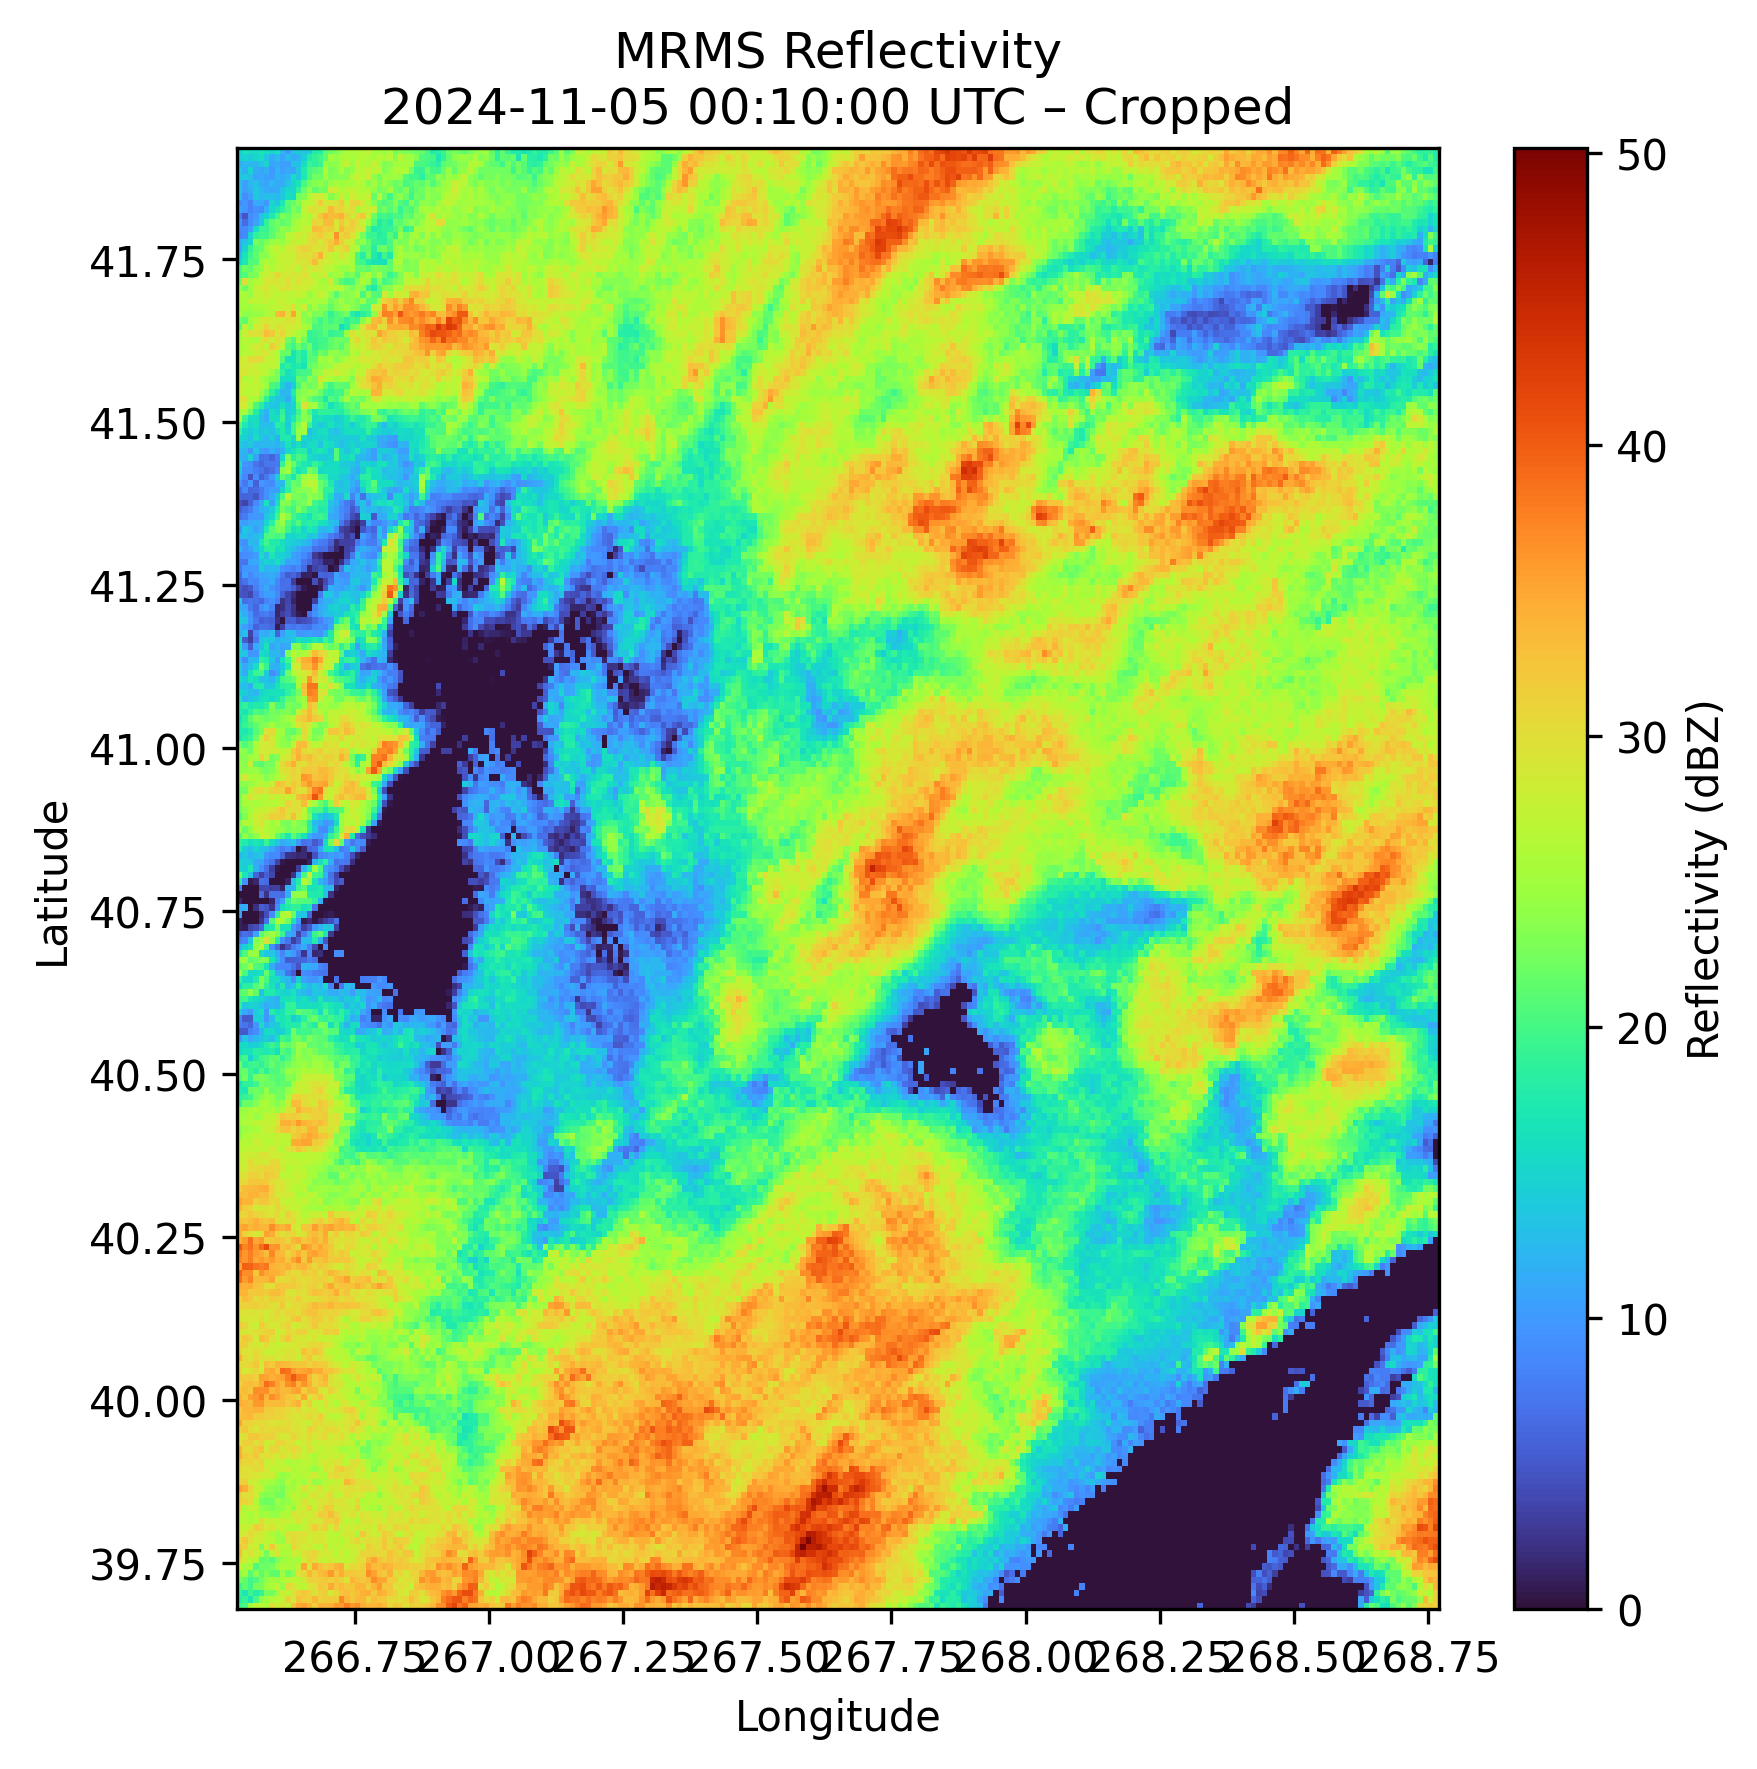

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6), dpi=300)         # smaller figure because it’s a tiny box
plt.pcolormesh(cropped.longitude,
               cropped.latitude,
               cropped['unknown'].clip(0),             # keep your reflectivity clipping rule
               shading='auto',
               cmap='turbo')

plt.colorbar(label='Reflectivity (dBZ)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('MRMS Reflectivity\n{} – Cropped'.format(ds.valid_time.dt.strftime('%Y-%m-%d %H:%M:%S UTC').item()))
plt.tight_layout()
plt.show()

In [4]:
df = ds.to_dataframe()

In [5]:
df['unknown'].max(), df['unknown'].min(), df['unknown'].shape

(np.float32(67.7), np.float32(-999.0), (24500000,))